In [6]:
conda install -c conda-forge catboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Did not find path entry D:\Users\OtaiAA0B\Anaconda3\bin


In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler # For Normalization
from sklearn.model_selection import train_test_split # For Splitting the data into train data and test data
from sklearn.linear_model import LinearRegression # For Creation of Linear Regression Model
from sklearn.ensemble import RandomForestRegressor # For Creation of Random Forest Regressor Model
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor # For Creation of CatBoost Regressor Model
amjdata = pd.read_csv("D:/Users/OtaiAA0B/Desktop/Bootcamp/Project/AmjadDt.csv")
amjdata.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [8]:
amjdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [9]:
amjdata_clean = amjdata.copy(deep = True)

In [10]:
amjdata.shape

(10668, 9)

In [11]:
amjdata.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

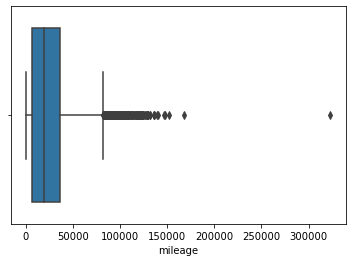

In [12]:
boxa = sns.boxplot(x = 'mileage', data = amjdata_clean)

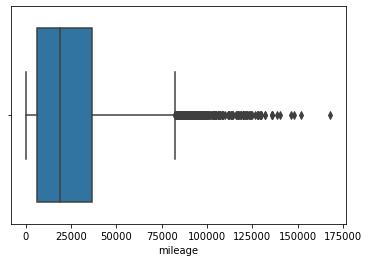

In [13]:
amjdata_clean = amjdata_clean[amjdata_clean['mileage'] < 175000]
boxa = sns.boxplot(x = 'mileage', data = amjdata_clean)

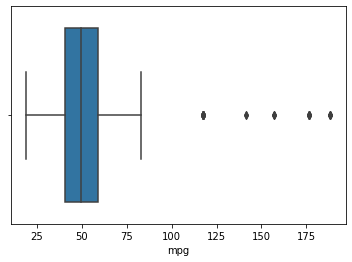

In [14]:
boxa = sns.boxplot(x = 'mpg', data = amjdata)

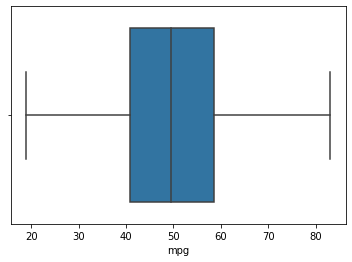

In [15]:
amjdata_clean = amjdata_clean[amjdata_clean['mpg'] < 110]
boxa = sns.boxplot(x = 'mpg', data = amjdata_clean)

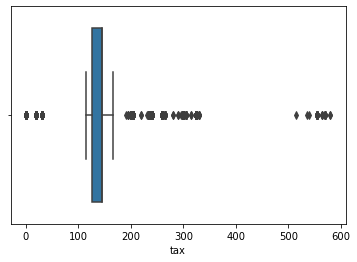

In [16]:
boxa = sns.boxplot(x = 'tax', data = amjdata_clean)

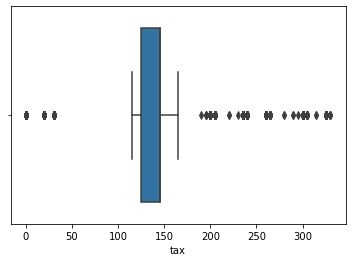

In [17]:
amjdata_clean = amjdata_clean[amjdata_clean['tax'] < 500]
boxa = sns.boxplot(x = 'tax', data = amjdata_clean)

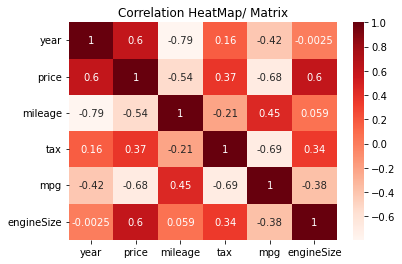

In [18]:
sns.heatmap(amjdata_clean.corr(), cmap ="Reds", annot = True)
plt.title("Correlation HeatMap/ Matrix")
plt.show()

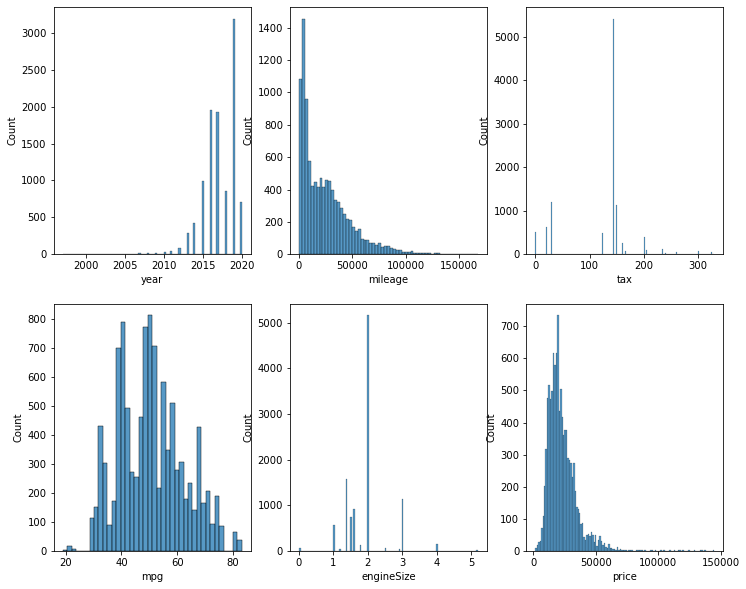

In [19]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(amjdata_clean["year"], ax = axes[0,0])
sns.histplot(amjdata_clean["mileage"], ax = axes[0,1])
sns.histplot(amjdata_clean["tax"], ax = axes[0,2])
sns.histplot(amjdata_clean["mpg"], ax = axes[1,0])
sns.histplot(amjdata_clean["engineSize"], ax = axes[1,1])
sns.histplot(amjdata_clean["price"], ax = axes[1,2])
plt.show()

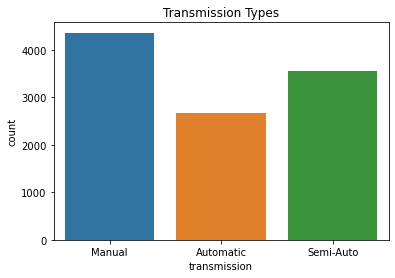

In [20]:
sns.countplot(x = "transmission", data = amjdata_clean)
plt.title("Transmission Types")
plt.show()

 A3     1914
 Q3     1417
 A4     1380
 A1     1347
 A5      882
 Q5      862
 Q2      822
 A6      746
 Q7      390
 TT      333
 A7      122
 A8      116
 Q8       69
 RS6      34
 RS3      33
 RS5      26
 RS4      23
 R8       18
 S3       18
 SQ5      16
 S4       11
 SQ7       8
 S8        3
 S5        3
 A2        1
Name: model, dtype: int64


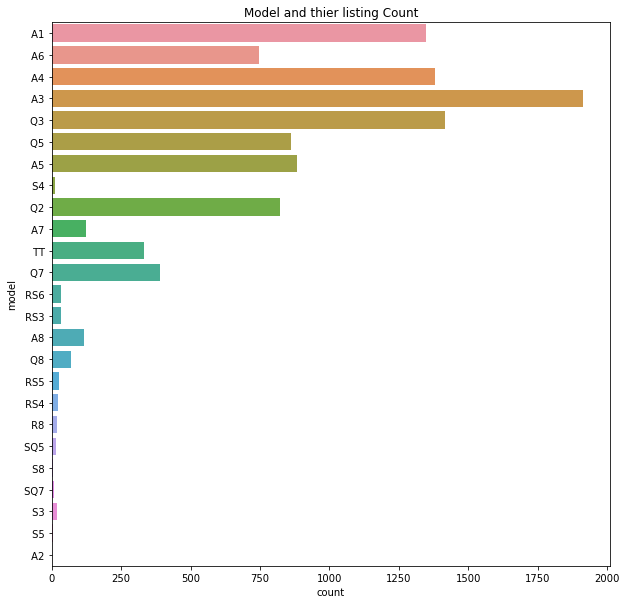

In [21]:
print(amjdata_clean["model"].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(y = amjdata_clean["model"])
plt.title("Model and thier listing Count")
plt.show()

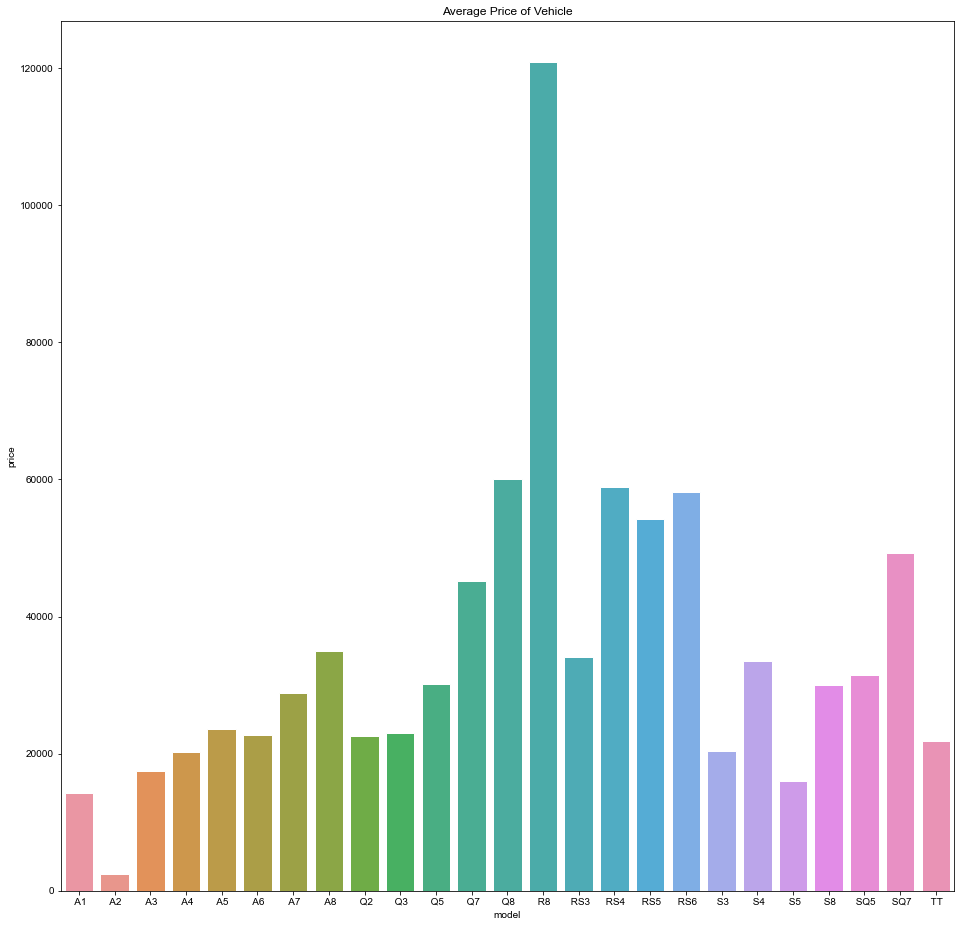

In [22]:
plt.subplots(figsize = (16,16))
priceByModel = amjdata_clean.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of Vehicle")
sns.set()
sns.barplot(x = 'model', y = 'price', data = priceByModel)
plt.show()

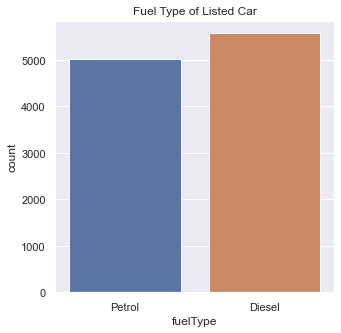

In [23]:
plt.figure(figsize = (5,5))
sns.countplot(x = "fuelType", data = amjdata_clean)
plt.title("Fuel Type of Listed Car")
plt.show()

In [24]:
amjdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [25]:
amjdata_clean = amjdata.copy(deep = True)

In [26]:
amjdata.shape

(10668, 9)

In [27]:
amjdata.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

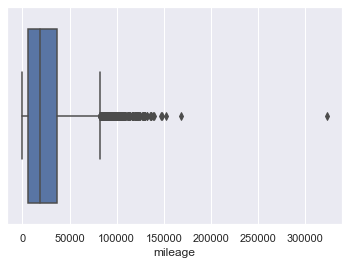

In [28]:
boxa = sns.boxplot(x = 'mileage', data = amjdata_clean)

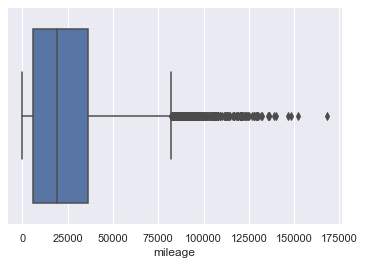

In [29]:
amjdata_clean = amjdata_clean[amjdata_clean['mileage'] < 175000]
boxa = sns.boxplot(x = 'mileage', data = amjdata_clean)

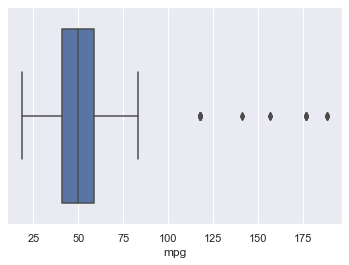

In [30]:
boxa = sns.boxplot(x = 'mpg', data = amjdata)

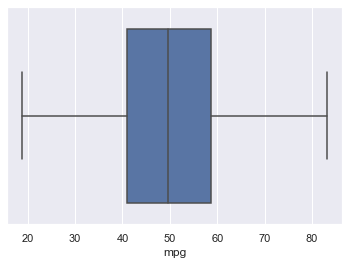

In [31]:
amjdata_clean = amjdata_clean[amjdata_clean['mpg'] < 110]
boxa = sns.boxplot(x = 'mpg', data = amjdata_clean)

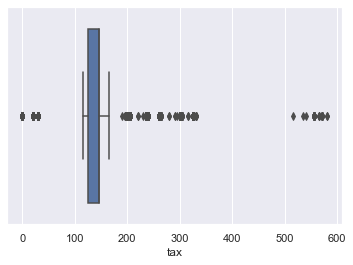

In [32]:
boxa = sns.boxplot(x = 'tax', data = amjdata_clean)

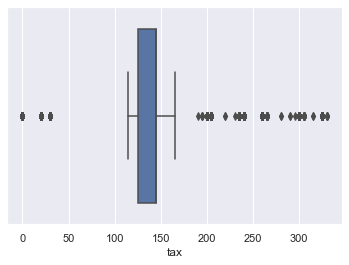

In [33]:
amjdata_clean = amjdata_clean[amjdata_clean['tax'] < 500]
boxa = sns.boxplot(x = 'tax', data = amjdata_clean)

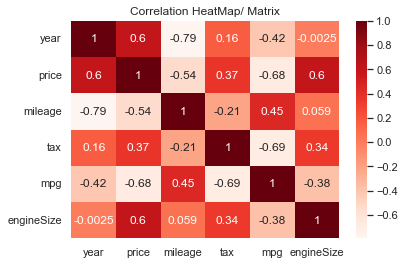

In [34]:
sns.heatmap(amjdata_clean.corr(), cmap ="Reds", annot = True)
plt.title("Correlation HeatMap/ Matrix")
plt.show()

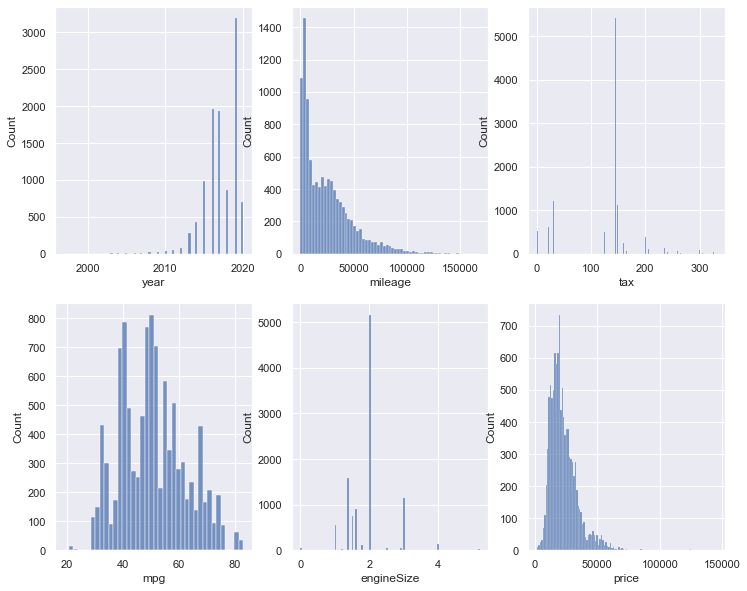

In [35]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(amjdata_clean["year"], ax = axes[0,0])
sns.histplot(amjdata_clean["mileage"], ax = axes[0,1])
sns.histplot(amjdata_clean["tax"], ax = axes[0,2])
sns.histplot(amjdata_clean["mpg"], ax = axes[1,0])
sns.histplot(amjdata_clean["engineSize"], ax = axes[1,1])
sns.histplot(amjdata_clean["price"], ax = axes[1,2])
plt.show()

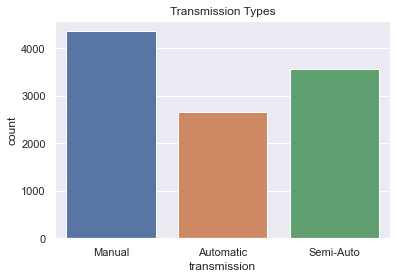

In [36]:
sns.countplot(x = "transmission", data = amjdata_clean)
plt.title("Transmission Types")
plt.show()

 A3     1914
 Q3     1417
 A4     1380
 A1     1347
 A5      882
 Q5      862
 Q2      822
 A6      746
 Q7      390
 TT      333
 A7      122
 A8      116
 Q8       69
 RS6      34
 RS3      33
 RS5      26
 RS4      23
 R8       18
 S3       18
 SQ5      16
 S4       11
 SQ7       8
 S8        3
 S5        3
 A2        1
Name: model, dtype: int64


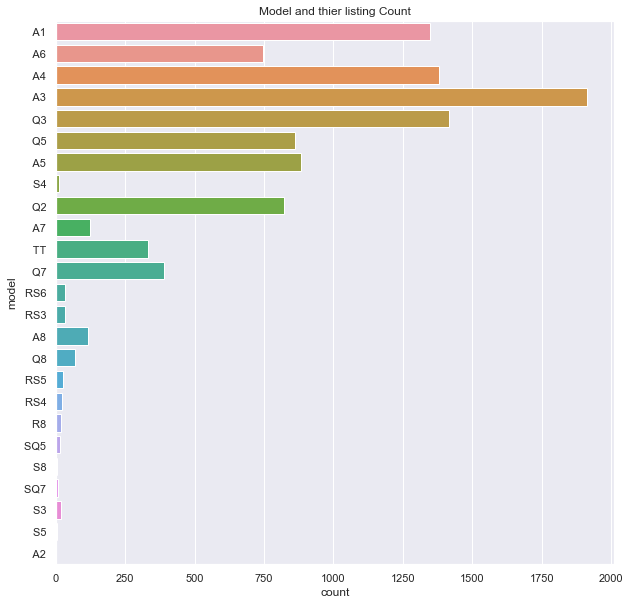

In [37]:
print(amjdata_clean["model"].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(y = amjdata_clean["model"])
plt.title("Model and thier listing Count")
plt.show()

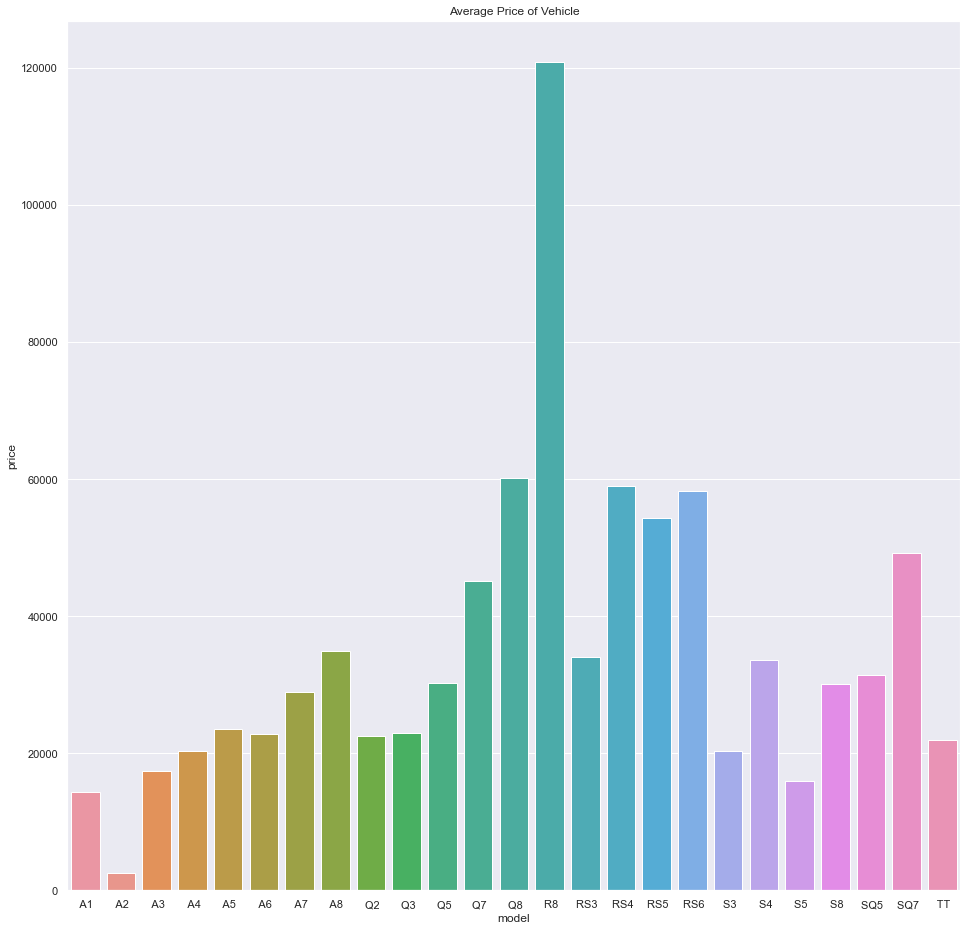

In [38]:
plt.subplots(figsize = (16,16))
priceByModel = amjdata_clean.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of Vehicle")
sns.set()
sns.barplot(x = 'model', y = 'price', data = priceByModel)
plt.show()

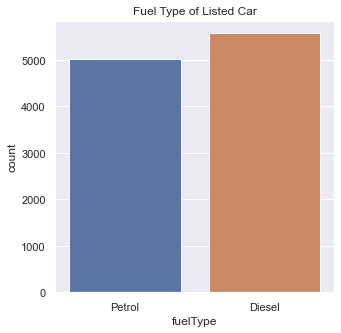

In [39]:
plt.figure(figsize = (5,5))
sns.countplot(x = "fuelType", data = amjdata_clean)
plt.title("Fuel Type of Listed Car")
plt.show()

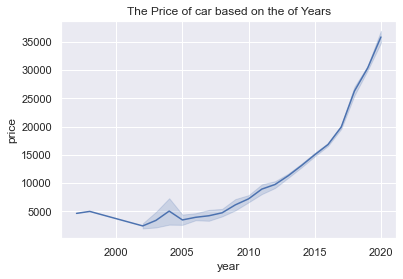

In [40]:
sns.lineplot(x = "year", y = "price", data = amjdata_clean)
plt.title("The Price of car based on the of Years")
plt.show()

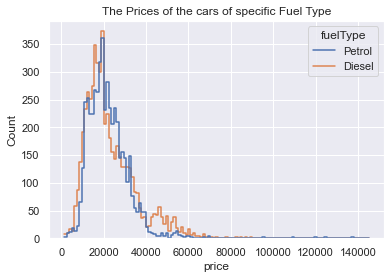

In [41]:
sns.histplot(data = amjdata_clean, x = 'price', hue = 'fuelType', fill = False, element = 'step')
plt.title("The Prices of the cars of specific Fuel Type")
plt.show()

In [42]:
encoder = LabelEncoder()
amjdata_clean['model'] = encoder.fit_transform(amjdata_clean['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' S3',
 19: ' S4',
 20: ' S5',
 21: ' S8',
 22: ' SQ5',
 23: ' SQ7',
 24: ' TT'}

In [43]:
amjdata_clean['fuelType'] = encoder.fit_transform(amjdata_clean['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Petrol'}

In [44]:
amjdata_clean['transmission'] = encoder.fit_transform(amjdata_clean['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [45]:
amjdata_clean.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,1,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,1,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,1,145,49.6,1.0


In [46]:
x = amjdata_clean.drop('price', axis = 1)
y = amjdata_clean['price']
scaler = MinMaxScaler(copy = True, feature_range = (0,1))
X = scaler.fit_transform(x)
X[:10]

array([[0.        , 0.86956522, 0.5       , 0.09364584, 1.        ,
        0.45454545, 0.56853583, 0.26923077],
       [0.20833333, 0.82608696, 0.        , 0.21546757, 0.        ,
        0.06060606, 0.70560748, 0.38461538],
       [0.        , 0.82608696, 0.5       , 0.17822707, 1.        ,
        0.09090909, 0.56853583, 0.26923077],
       [0.125     , 0.86956522, 0.        , 0.15445553, 0.        ,
        0.43939394, 0.75389408, 0.38461538],
       [0.08333333, 0.95652174, 0.5       , 0.01188577, 1.        ,
        0.43939394, 0.47819315, 0.19230769],
       [0.        , 0.82608696, 0.        , 0.19199957, 1.        ,
        0.09090909, 0.62305296, 0.26923077],
       [0.20833333, 0.82608696, 0.        , 0.45702195, 0.        ,
        0.09090909, 0.66199377, 0.38461538],
       [0.125     , 0.82608696, 0.5       , 0.44748119, 0.        ,
        0.06060606, 0.80529595, 0.38461538],
       [0.08333333, 0.7826087 , 0.5       , 0.2744441 , 1.        ,
        0.06060606, 0.641744

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35, random_state=0)

In [48]:
#x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=1)

#x_train, x_val, y_train, y_val   = train_test_split(x_train, y_train, test_size=0.25, random_state=1)
#train_size = 0.6
#validate_size = 0.2
#train, validate, test = np.split(amjdata.sample(frac=1), [int(train_size * len(amjdata)), int((validate_size + train_size) * len(amjdata))])

In [49]:
print("Shape of the x_train: ", x_train.shape)
print("Shape of the x_test: ", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the x_train:  (6886, 8)
Shape of the x_test:  (3708, 8)
Shape of y_train: (6886,)
Shape of the y_test:  (3708,)


In [50]:
LinearRegressionModel = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs = -1)
LinearRegressionModel.fit(x_train, y_train)


print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))

print('----------------------------------------------------')
y_pred = LinearRegressionModel.predict(x_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.8247222369421101
Linear Regression Test Score is :  0.802362767689407
----------------------------------------------------
Predicted Value for Linear Regression is :  [45350.5364866  35484.21220177  6641.76169241 15247.46129149
 41272.85147646 44191.43873359 35123.80302147 14267.41599704
 12960.46970305 19888.50087271]


In [51]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(10)

,index,Actual Price,Predicted Price
0,4836,51990,45350.536487
1,5146,29990,35484.212202
2,8824,10500,6641.761692
3,10256,17600,15247.461291
4,3363,39500,41272.851476
5,8650,45950,44191.438734
6,4786,37990,35123.803021
7,8140,16599,14267.415997
8,8379,9999,12960.469703
9,8084,19700,19888.500873


In [52]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest  Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest  Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest  No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest  is : ' , y_pred[:10])

Random Forest  Train Score is :  0.9787520650217197
Random Forest  Test Score is :  0.9556898105633875
Random Forest  No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest  is :  [53397.98768334 33352.0846768  10720.49012831 20566.74741075
 39725.08112047 45049.42153305 36261.98396967 17302.14177341
 11711.98301038 18800.79135818]


In [53]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(10)

,index,Actual Price,Predicted Price
0,4836,51990,53397.987683
1,5146,29990,33352.084677
2,8824,10500,10720.490128
3,10256,17600,20566.747411
4,3363,39500,39725.081120
5,8650,45950,45049.421533
6,4786,37990,36261.983970
7,8140,16599,17302.141773
8,8379,9999,11711.983010
9,8084,19700,18800.791358


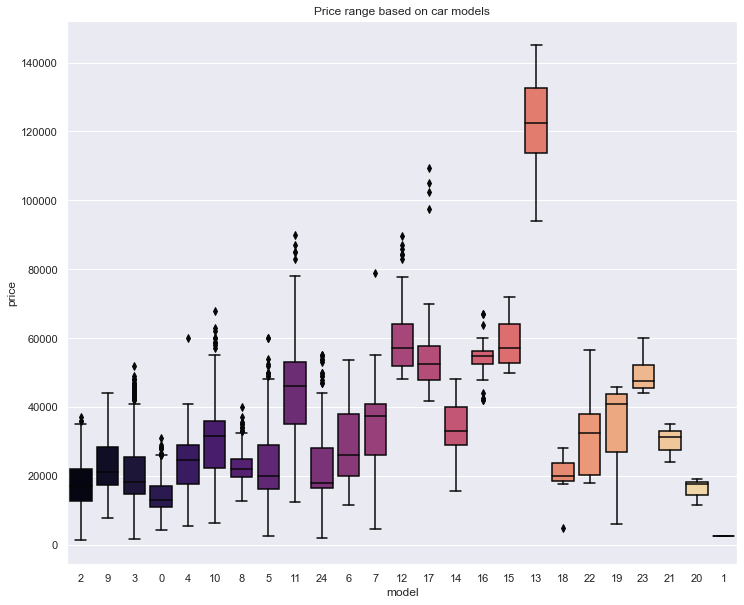

In [54]:
plt.figure(figsize = (12,10))
sns.boxplot(data = amjdata_clean, x = 'model', y = 'price', order = amjdata_clean['model'].value_counts().index, palette = 'magma')
plt.title("Price range based on car models")
plt.show()

In [55]:
catModel = CatBoostRegressor(verbose = 0, random_state = 35)
catModel.fit(x_train, y_train)
y_pred = catModel.predict(x_test)
r2 = r2_score(y_pred, y_test)
print(f'CatBoost Regressor Model by Yandex r2 score : {r2:0.5f}')

CatBoost Regressor Model by Yandex r2 score : 0.95926


In [56]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(10)

,index,Actual Price,Predicted Price
0,4836,51990,52836.062855
1,5146,29990,33293.209230
2,8824,10500,10542.678403
3,10256,17600,19087.141705
4,3363,39500,38260.034139
5,8650,45950,45628.960106
6,4786,37990,38048.494567
7,8140,16599,17064.384809
8,8379,9999,11995.456228
9,8084,19700,17902.677663
